# Question 1

In [1]:
import json
with open(r'lines_question1.json') as f:
    x=json.load(f)
data = json.dumps(x)
di = json.loads(data)
m1=float(input('Enter slope-->'))
d={}
print('Lines with similar slope:')
for i in di['lines']:
    y1=i[0][1]
    y2=i[1][1]
    x1=i[0][0]
    x2=i[1][0]
    m=(y2-y1)/(x2-x1)
    if(m1==m):
        print(i)

Enter slope-->0
Lines with similar slope:
[[92, 37], [8, 37]]
[[83, 29], [82, 29]]


# Question 2

In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt

with open(r'edges.json') as f:
    x=json.load(f)
data = json.dumps(x)
di = json.loads(data)
G = nx.DiGraph()
x=[]
for i in di['edges']:
    x.append(tuple(i))
for i in x:
    p1=(str(i[0]))
    p2=(str(i[1]))
    G.add_edge(p1,p2)
start=list(G.in_degree())[0][0]
print('BFS Traversal from indegree=0 node:')
for i in (nx.bfs_edges(G,start)):
    print(i)



BFS Traversal from indegree=0 node:
('[10, 0]', '[5, 0]')
('[5, 0]', '[0, 0]')
('[0, 0]', '[-5, 0]')
('[-5, 0]', '[-5, -5]')
('[-5, 0]', '[-5, 5]')
('[-5, 0]', '[-10, 0]')
('[-5, 5]', '[-3, 5]')
('[-5, 5]', '[-7, 5]')
('[-10, 0]', '[-10, -10]')
('[-7, 5]', '[-10, 10]')


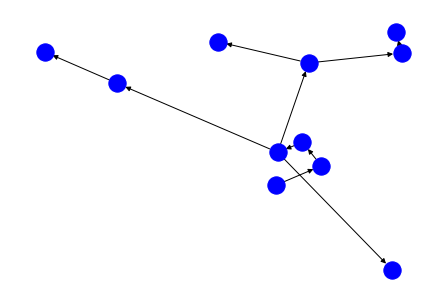

In [9]:
nx.draw(G, cmap = plt.get_cmap('jet'), node_color = 'blue')
# nx.draw(G)
plt.show()

#  Question 3

Number of nodes with degree=2 are: 4


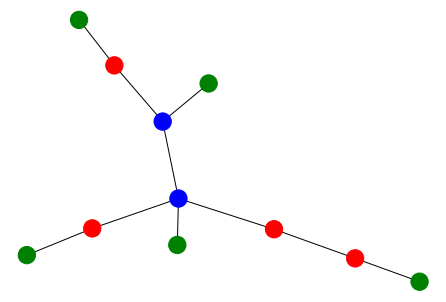

In [11]:
#Part 1
g=G.to_undirected()
m=dict(g.degree())
count=0
deg2=[]
deg1=[]
for k,v in m.items():
    if(v==2):
        count+=1
        deg2.append(k)
    if(v==1):
        deg1.append(k)
color_map=[]
for node in g:
    if node in deg1:
        color_map.append('green')
    elif node in deg2:
        color_map.append('red')
    else:
        color_map.append('blue')
print('Number of nodes with degree=2 are:',count)
nx.draw(g, node_color = color_map)

In [10]:
print("Largest Blue colored chain=2")

Largest Blue colored chain=2


In [5]:
#Part 2

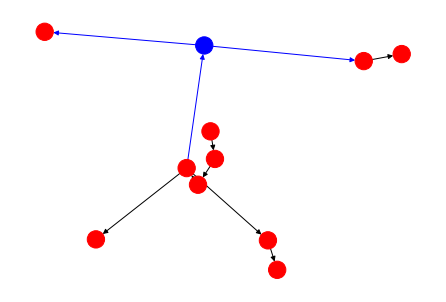

In [4]:
out2=dict(G.out_degree())
bluenode=[]
for k,v in out2.items():
    if(v==2):
        bluenode=k
color_map=[]
for node in G:
    if node==bluenode:
        color_map.append('blue')
    else:
        color_map.append('red')
              
x1=list(G.in_edges(bluenode))+list(G.out_edges(bluenode))
edge_map=[]
label_map={}
for i in list(G.edges()):
    if(i in x1):
        edge_map.append('blue')
        label_map[i]='perpendicular'
    else:
        edge_map.append('black')
pos = nx.spring_layout(G)

nx.draw(G, edge_color=edge_map,node_color = color_map)

# Question 4

In [94]:
def findIslands(grid,m,n):
    count = 0
    for r,row in enumerate(grid):
        for c,col in enumerate(row):
            if grid[r][c] == '1':
                removeNeighbors(r,c,grid)
                count += 1
    return count            
def removeNeighbors( r ,c, grid):
    grid[r][c] = 0 
    # print(grid)   
    if r+1 < len(grid) and grid[r+1][c] == '1':
        removeNeighbors(r+1,c,grid)
    if c+1 < len(grid[0]) and grid[r][c+1] == '1':
        removeNeighbors(r,c+1,grid)    
    if r-1 >= 0 and grid[r-1][c] == '1':
        removeNeighbors(r-1,c,grid)
    if c-1 >= 0 and grid[r][c-1] == '1':
        removeNeighbors(r,c-1,grid)
    try:
        if r+1 < len(grid) and grid[r+1][c+1] == '1':
            removeNeighbors(r+1,c+1,grid)
    
    except:
        pass

In [95]:
a='1 1 0 0 0 1 1 0 1'
x=a.split(' ')
m=3
n=3
t=0
grid=[]
for i in range(0,n):
    grid.append(x[t:t+m])
    t=t+m
findIslands(grid,m,n)

2